# Regressão Softmax com dados do MNIST utilizando gradiente descendente estocástico por minibatches

O objetivo deste notebook é ilustrar
- o uso do gradiente estocástico por mini-batchs
- utilizando as classes Dataset e DataLoater.

A apresentação da perda nos gráficos é um pouco diferente da usual, mostrando a perda de cada um dos vários minibatches dentro de cada época, de forma que as épocas são apresentadas com valores fracionários.

## Importação das bibliotecas

In [46]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.autograd import Variable
from torch.utils.data import DataLoader

import torchvision
from torchvision.datasets import MNIST

## Dataset e dataloader

### Definição do tamanho do minibatch

In [47]:
batch_size = 100

### Carregamento, criação dataset e do dataloader

In [48]:
dataset_dir = 'MNIST/'

dataset_train = MNIST(dataset_dir, train=True, download=True,
                      transform=torchvision.transforms.ToTensor())

loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)

print('Número de minibatches de trenamento:', len(loader_train))

x_train, y_train = next(iter(loader_train))
print("\nDimensões dos dados de um minibatch:", x_train.size())
print("Valores mínimo e máximo dos pixels: ", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:         ", type(x_train))
print("Tipo das classes das imagens:       ", type(y_train))

Número de minibatches de trenamento: 200

Dimensões dos dados de um minibatch: torch.Size([300, 1, 28, 28])
Valores mínimo e máximo dos pixels:  tensor(0.) tensor(1.)
Tipo dos dados das imagens:          <class 'torch.Tensor'>
Tipo das classes das imagens:        <class 'torch.Tensor'>


### Usando todas as amostras do MNIST

Neste exemplo utilizaremos todas as amostras de treinamento.

In [49]:
print('Número de minibatches de trenamento:', len(loader_train))
n_batches_train = len(loader_train)
total_samples = dataset_train.train_data.size(0)

Número de minibatches de trenamento: 200


/usr/local/lib/python3.12/dist-packages/torchvision/datasets/mnist.py:76: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


## Modelo

In [50]:
model = torch.nn.Linear(28*28, 10)

In [51]:
x = torch.ones(28*28).reshape(1, 784)
print(x.shape)
predict = model(x)
predict

torch.Size([1, 784])


tensor([[ 0.0976, -1.1324,  0.3995,  0.1765, -0.5038, -0.4498, -0.5529, -0.4143,
         -0.3150,  0.3910]], grad_fn=<AddmmBackward0>)

## Treinamento

### Inicialização dos parâmetros

In [52]:
n_epochs = 5
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Laço de treinamento dos parâmetros

In [53]:
epochs = []
losses = []
losses_epoch = []
best_loss_epoch = 100
accuracies_epoch = [] # Nova lista para armazenar a acurácia de cada época

total_trained_samples = 0
for i in range(n_epochs):
    correct_predictions_current_epoch = 0 # Inicializa para a época atual
    total_samples_current_epoch = 0       # Inicializa para a época atual

    for k,(x_train, y_train) in enumerate(loader_train):
        # Transforma a entrada para uma dimensão
        inputs = x_train.view(-1, 28 * 28)
        # predict da rede
        outputs = model(inputs)

        # calcula a perda
        loss = criterion(outputs, y_train)

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Calcular acurácia para o minibatch atual
        predicted = torch.argmax(outputs, dim=1)
        correct_predictions_current_epoch += (predicted == y_train).sum().item()
        total_samples_current_epoch += y_train.size(0)

        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.data)

        if loss.data < best_loss_epoch:
            best_loss_epoch = loss.data

        # Print no final de cada minibatch
        print(f'Época: {i+1}/{n_epochs}, batch: {k+1}')

    # Após cada época, calcula e imprime a acurácia da época e registra a melhor perda
    epoch_accuracy = correct_predictions_current_epoch / total_samples_current_epoch
    accuracies_epoch.append(epoch_accuracy)
    print(f'--- Fim da Época {i+1} --- Perda mínima: {best_loss_epoch:.4f}, Acurácia: {epoch_accuracy:.4f}')
    losses_epoch.append(best_loss_epoch)
    best_loss_epoch = 100 # Reseta para a próxima época (conforme lógica original)

Época: 1/5, batch: 1
Época: 1/5, batch: 2
Época: 1/5, batch: 3
Época: 1/5, batch: 4
Época: 1/5, batch: 5
Época: 1/5, batch: 6
Época: 1/5, batch: 7
Época: 1/5, batch: 8
Época: 1/5, batch: 9
Época: 1/5, batch: 10
Época: 1/5, batch: 11
Época: 1/5, batch: 12
Época: 1/5, batch: 13
Época: 1/5, batch: 14
Época: 1/5, batch: 15
Época: 1/5, batch: 16
Época: 1/5, batch: 17
Época: 1/5, batch: 18
Época: 1/5, batch: 19
Época: 1/5, batch: 20
Época: 1/5, batch: 21
Época: 1/5, batch: 22
Época: 1/5, batch: 23
Época: 1/5, batch: 24
Época: 1/5, batch: 25
Época: 1/5, batch: 26
Época: 1/5, batch: 27
Época: 1/5, batch: 28
Época: 1/5, batch: 29
Época: 1/5, batch: 30
Época: 1/5, batch: 31
Época: 1/5, batch: 32
Época: 1/5, batch: 33
Época: 1/5, batch: 34
Época: 1/5, batch: 35
Época: 1/5, batch: 36
Época: 1/5, batch: 37
Época: 1/5, batch: 38
Época: 1/5, batch: 39
Época: 1/5, batch: 40
Época: 1/5, batch: 41
Época: 1/5, batch: 42
Época: 1/5, batch: 43
Época: 1/5, batch: 44
Época: 1/5, batch: 45
Época: 1/5, batch: 

In [54]:
print('Final loss:', loss.data)

Final loss: tensor(0.3295)


### Visualizando gráfico de perda durante o treinamento

Text(0.5, 0, 'época')

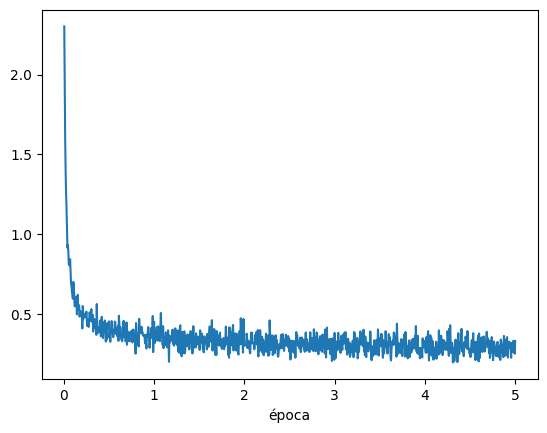

In [55]:
plt.plot(epochs, losses)
plt.xlabel('época')

### Visualização usual da perda, somente no final de cada minibatch

Text(0.5, 0, 'época')

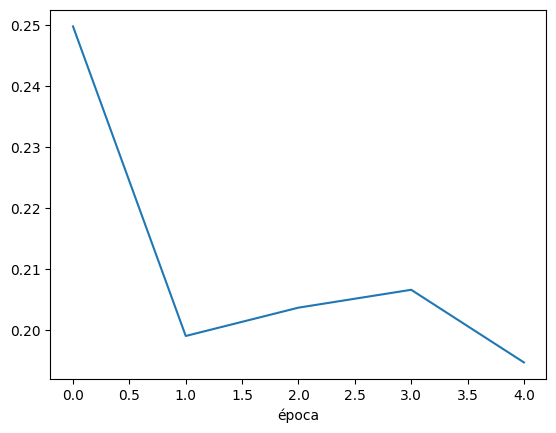

In [56]:
plt.plot(range(n_epochs), losses_epoch)
plt.xlabel('época')


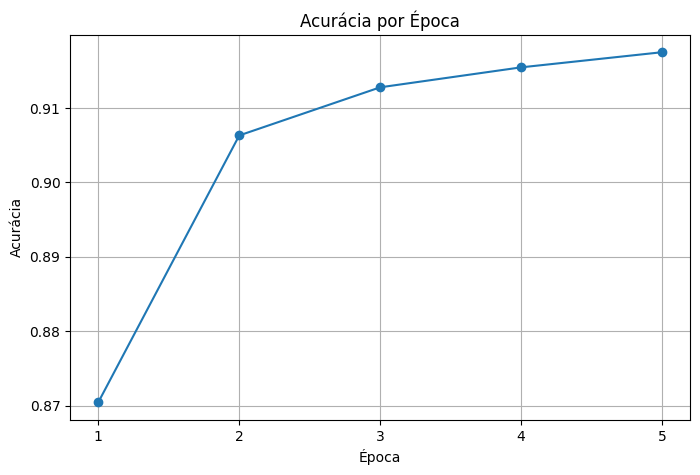

In [57]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, n_epochs + 1), accuracies_epoch, marker='o')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.title('Acurácia por Época')
plt.grid(True)
plt.xticks(range(1, n_epochs + 1))
plt.show()

# Atividades

## Perguntas

1. Qual é o tamanho do mini-batch?
2. Em uma época, quantos mini-batches existem?
3. Qual é a definição de época?

1 - O tamanho do mini-batch é de 100

2 - Em uma época, existem 600 mini-batches

3 - Uma época é uma passagem completa de todo o conjunto de dados de treinamento através do algoritmo de aprendizado. Durante uma época, cada amostra de treinamento é processada pelo menos uma vez, e os pesos do modelo são atualizados. Se o conjunto de dados tiver didivido em mini-batches numa época todos eles seram processados

## Exercícios


1. Coloque um print no final de cada minibatch, no mesmo estilo do print do final de época, no seguinte estilo:
    - Época: 1/4, batch: 600
2. Altere o tamanho de minibatch (batch_size) algumas vezes, refaça o treinamento, e compare no gráfico abaixo a queda da perda para cada tamanho de minibatch.

## Conclusões sobre os experimentos deste notebook


## Preparar para Experimentos

### Subtask:
Definir uma lista de tamanhos de mini-batch para experimentar e inicializar estruturas de dados para armazenar as perdas de cada experimento.


In [58]:
batch_sizes_to_experiment = [64, 128, 256, 512, 1024]
losses_per_batch_size = {}
epochs_per_batch_size = {}

## Executar Treinamento para Cada Tamanho de Mini-Batch

### Subtask:
Iterar sobre os tamanhos de mini-batch definidos. Para cada um, reconfigurar o DataLoader, reinicializar o modelo e o otimizador, e executar o laço de treinamento completo. As perdas de cada mini-batch serão armazenadas separadamente para cada batch_size.


In [59]:
for current_batch_size in batch_sizes_to_experiment:
    print(f"\n--- Training with batch size: {current_batch_size} ---")

    # Reconfigure DataLoader
    loader_train = DataLoader(dataset_train, batch_size=current_batch_size, shuffle=True)

    # Reinitialize model and optimizer
    model = torch.nn.Linear(28*28, 10)
    optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

    current_epochs = []
    current_losses = []
    total_trained_samples = 0

    for i in range(n_epochs):
        for k,(x_train, y_train) in enumerate(loader_train):
            # Transform input to one dimension
            inputs = x_train.view(-1, 28 * 28)
            # Predict with the network
            outputs = model(inputs)

            # Calculate loss
            loss = criterion(outputs, y_train)

            # Zero, backpropagation, adjust parameters by gradient descent
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_trained_samples += x_train.size(0)
            current_epochs.append(total_trained_samples / total_samples)
            current_losses.append(loss.data)

            # Optional: print progress for each minibatch
            # print(f'Batch Size: {current_batch_size}, Época: {i+1}/{n_epochs}, batch: {k+1}, Loss: {loss.data:.4f}')

    losses_per_batch_size[current_batch_size] = current_losses
    epochs_per_batch_size[current_batch_size] = current_epochs
    print(f"Finished training for batch size {current_batch_size}.")

print("All training runs completed.")


--- Training with batch size: 64 ---
Finished training for batch size 64.

--- Training with batch size: 128 ---
Finished training for batch size 128.

--- Training with batch size: 256 ---
Finished training for batch size 256.

--- Training with batch size: 512 ---
Finished training for batch size 512.

--- Training with batch size: 1024 ---
Finished training for batch size 1024.
All training runs completed.


## Visualizar Perdas Comparativas


gráfico que exibe as curvas de perda de todos os experimentos, permitindo uma comparação visual direta de como diferentes tamanhos de mini-batch afetam a convergência da perda.


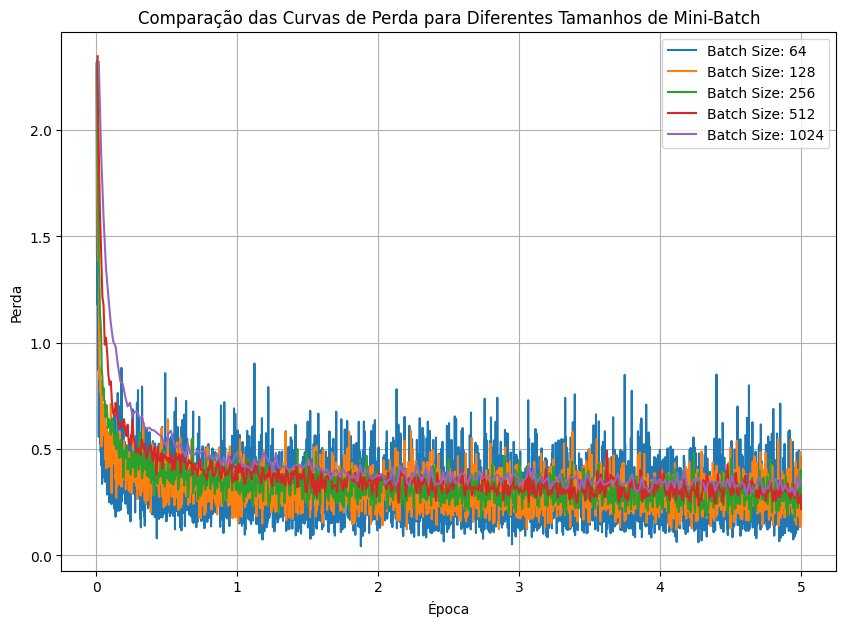

In [60]:
plt.figure(figsize=(10, 7))
for batch_size_val, losses_val in losses_per_batch_size.items():
    epochs_val = epochs_per_batch_size[batch_size_val]
    plt.plot(epochs_val, [l.item() for l in losses_val], label=f'Batch Size: {batch_size_val}')

plt.xlabel('Época')
plt.ylabel('Perda')
plt.title('Comparação das Curvas de Perda para Diferentes Tamanhos de Mini-Batch')
plt.legend()
plt.grid(True)
plt.show()

##Resumo

O processo de treinamento foi executado com sucesso para cinco tamanhos diferentes de mini-batch: 64, 128, 256, 512 e 1024.

Os dados de perda e progressão da época foram meticulosamente coletados para cada tamanho de mini-batch, confirmando a independência de cada experimento.

O gráfico gerado visualizou efetivamente as curvas de perda, com o eixo x representando 'Época' e o eixo y 'Perda', intitulado "Comparação das Curvas de Perda para Diferentes Tamanhos de Mini-Batch."

Tamanhos de batch menores (por exemplo, 64, 128) resultaram em curvas de perda que mostraram mais flutuações, mas geralmente desceram efetivamente.

Tamanhos de batch maiores (por exemplo, 512, 1024) produziram curvas de perda notavelmente mais suaves, indicando atualizações de gradiente mais estáveis, mas sua descida pode parecer menos agressiva em comparação com batches menores em termos do número de etapas de gradiente.

